In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
import seaborn as sns
import smogn

# 讀取 Excel 表
df1 = pd.read_excel('/Users/ccit0915/Desktop/論文素材/論文data彙整1130413.xlsx', sheet_name='2024-1月')
df2 = pd.read_excel('/Users/ccit0915/Desktop/論文素材/論文data彙整1130413.xlsx', sheet_name='2024-2月')
df3 = pd.read_excel('/Users/ccit0915/Desktop/論文素材/論文data彙整1130413.xlsx', sheet_name='2024-3月')
df4 = pd.read_excel('/Users/ccit0915/Desktop/論文素材/論文data彙整1130413.xlsx', sheet_name='2024-4月')
df5 = pd.read_excel('/Users/ccit0915/Desktop/論文素材/論文data彙整1130413.xlsx', sheet_name='2024-5月')
df6 = pd.read_excel('/Users/ccit0915/Desktop/論文素材/論文data彙整1130413.xlsx', sheet_name='2024-6月')


# 合併 DataFrame
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

# 顯示合併後的 DataFrame
print(df)

                  原料編號      產品編號   數量       下料日期  單片排版數   PCS總數 客戶名稱
0     1BT-30M10PZZ152D  7P05-N72  144 2024-01-02    600   86400  P05
1     1BT-30M10PZZ152D  7P05-N90  384 2024-01-02    880  337920  P05
2     1BT-44N10PZZ182L  7A66-DD7   48 2024-01-02   1280   61440  A66
3     1BT-44N10PZZ182L  7A67-J03   96 2024-01-02   2750  264000  A67
4     1BT-44N10PZZ182L  7A67-J27   48 2024-01-02   1350   64800  A67
...                ...       ...  ...        ...    ...     ...  ...
2785  1BT-43N10PZZ112L  7Q51-642   60 2024-06-30   1120   67200  A66
2786  1BT-43N10PZZ112L  7Q56-452  180 2024-06-30   1680  302400  L08
2787  1BT-43N10PZZ112L  7Q51-452   40 2024-06-30   1680   67200  A66
2788  1BT-62A06P32252M  7Q52-707   96 2024-06-30   3456  331776  P01
2789  1BT-62J04P32252M  7S20-754  192 2024-06-30    600  115200  S20

[2790 rows x 7 columns]


In [82]:
# 找出稀少類別的函數
def find_rare_categories(df, columns):
    rare_categories = {}
    for column in columns:
        counts = df[column].value_counts()
        rare = counts[counts == 1].index.tolist()  # 篩選只出現一次的類別
        if rare:
            rare_categories[column] = rare
    return rare_categories

# 找出稀少類別
columns_to_check = ['原料編號', '客戶名稱']
rare_categories = find_rare_categories(df, columns_to_check)

# 刪除包含稀少類別的行數
for column, rare in rare_categories.items():
    df = df[~df[column].isin(rare)]  # 用 ~ 排除稀少類別的行數

# 顯示刪除後的 DataFrame
print(df)

# 檢查刪除情況
for column, rare in rare_categories.items():
    print(f"刪除的稀少類別 ({column}): {rare}")

                  原料編號      產品編號   數量       下料日期  單片排版數   PCS總數 客戶名稱
0     1BT-30M10PZZ152D  7P05-N72  144 2024-01-02    600   86400  P05
1     1BT-30M10PZZ152D  7P05-N90  384 2024-01-02    880  337920  P05
2     1BT-44N10PZZ182L  7A66-DD7   48 2024-01-02   1280   61440  A66
3     1BT-44N10PZZ182L  7A67-J03   96 2024-01-02   2750  264000  A67
4     1BT-44N10PZZ182L  7A67-J27   48 2024-01-02   1350   64800  A67
...                ...       ...  ...        ...    ...     ...  ...
2785  1BT-43N10PZZ112L  7Q51-642   60 2024-06-30   1120   67200  A66
2786  1BT-43N10PZZ112L  7Q56-452  180 2024-06-30   1680  302400  L08
2787  1BT-43N10PZZ112L  7Q51-452   40 2024-06-30   1680   67200  A66
2788  1BT-62A06P32252M  7Q52-707   96 2024-06-30   3456  331776  P01
2789  1BT-62J04P32252M  7S20-754  192 2024-06-30    600  115200  S20

[2786 rows x 7 columns]
刪除的稀少類別 (原料編號): ['1BT-33J0KP32252D', '1BT-66T05P32212M']
刪除的稀少類別 (客戶名稱): ['P03', 'T80']


In [84]:
df

,原料編號,產品編號,數量,下料日期,單片排版數,PCS總數,客戶名稱
0,1BT-30M10PZZ152D,7P05-N72,144,2024-01-02,600,86400,P05
1,1BT-30M10PZZ152D,7P05-N90,384,2024-01-02,880,337920,P05
2,1BT-44N10PZZ182L,7A66-DD7,48,2024-01-02,1280,61440,A66
3,1BT-44N10PZZ182L,7A67-J03,96,2024-01-02,2750,264000,A67
4,1BT-44N10PZZ182L,7A67-J27,48,2024-01-02,1350,64800,A67
...,...,...,...,...,...,...,...
2785,1BT-43N10PZZ112L,7Q51-642,60,2024-06-30,1120,67200,A66
2786,1BT-43N10PZZ112L,7Q56-452,180,2024-06-30,1680,302400,L08
2787,1BT-43N10PZZ112L,7Q51-452,40,2024-06-30,1680,67200,A66
2788,1BT-62A06P32252M,7Q52-707,96,2024-06-30,3456,331776,P01


In [38]:
df.drop(columns=['單片排版數', '數量'], inplace=True)
print(df.head())

               原料編號      產品編號       下料日期   PCS總數 客戶名稱
0  1BT-30M10PZZ152D  7P05-N72 2024-01-02   86400  P05
1  1BT-30M10PZZ152D  7P05-N90 2024-01-02  337920  P05
2  1BT-44N10PZZ182L  7A66-DD7 2024-01-02   61440  A66
3  1BT-44N10PZZ182L  7A67-J03 2024-01-02  264000  A67
4  1BT-44N10PZZ182L  7A67-J27 2024-01-02   64800  A67


In [39]:
# 對'PCS總數' 進行對數轉換
df['PCS總數'] = df['PCS總數'].apply(lambda x: np.log(x))

print(df.head())

               原料編號      產品編號       下料日期      PCS總數 客戶名稱
0  1BT-30M10PZZ152D  7P05-N72 2024-01-02  11.366743  P05
1  1BT-30M10PZZ152D  7P05-N90 2024-01-02  12.730564  P05
2  1BT-44N10PZZ182L  7A66-DD7 2024-01-02  11.025816  A66
3  1BT-44N10PZZ182L  7A67-J03 2024-01-02  12.483704  A67
4  1BT-44N10PZZ182L  7A67-J27 2024-01-02  11.079061  A67


In [40]:
# 先將 '下料日期' 欄位轉換為日期時間格式
df['下料日期'] = pd.to_datetime(df['下料日期'])

# 提取年、月、日特徵
df['year'] = df['下料日期'].dt.year
df['mon'] = df['下料日期'].dt.month
df['day'] = df['下料日期'].dt.day

In [41]:
from sklearn.model_selection import train_test_split

# 定義特徵 (X) 和目標變數 (y)
X = df[['產品編號', 'mon', 'day', '客戶名稱', '原料編號']]  # 特徵
y = df['PCS總數']  # 目標變數


# 將數據分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2228, 5)
(558, 5)


In [42]:
import category_encoders as ce

# 創建目標編碼器
target_encoder_train = ce.TargetEncoder(cols=['產品編號'])
X_train['product_encoded'] = target_encoder_train.fit_transform(X_train['產品編號'], y_train)

# 計算 '客戶名稱' 的頻率
customer_freq_train = X_train['客戶名稱'].value_counts(normalize=True)
X_train['client_encoded'] = X_train['客戶名稱'].map(customer_freq_train)

# 計算 '原料編號' 的頻率
material_freq_train = X_train['原料編號'].value_counts(normalize=True)
X_train['raw_material_encoded'] = X_train['原料編號'].map(material_freq_train)

In [43]:
# 將 y_train（PCS總數）臨時加入 X_train
X_train['PCS總數'] = y_train

# 計算新特徵
X_train['product_raw_material_interaction_encoded'] = X_train.groupby(['product_encoded', 'raw_material_encoded'])['PCS總數'].transform('mean')
X_train['product_client_interaction_encoded'] = X_train.groupby(['product_encoded', 'client_encoded'])['PCS總數'].transform('mean')
X_train['product_mon'] =  X_train['product_encoded'] * X_train['mon']
X_train['product_day'] =  X_train['product_encoded'] * X_train['day']

# 計算完後，可以選擇再次移除
X_train.drop(columns=['PCS總數'], inplace=True)

In [44]:
X_train.drop(columns=['原料編號'], inplace=True)
X_train.drop(columns=['客戶名稱'], inplace=True)
X_train.drop(columns=['產品編號'], inplace=True)

X_train

,mon,day,product_encoded,client_encoded,raw_material_encoded,product_raw_material_interaction_encoded,product_client_interaction_encoded,product_mon,product_day
600,2,7,9.527831,0.125224,0.109515,9.496365,9.496365,19.055663,66.694819
1520,4,13,11.714130,0.179533,0.087971,13.432364,13.432364,46.856521,152.283694
2750,6,27,12.532385,0.039946,0.035907,13.110459,13.110459,75.194308,338.374388
100,1,9,11.095987,0.038151,0.030521,10.488235,10.488235,11.095987,99.863884
316,1,22,11.246378,0.054309,0.092460,11.248960,11.248960,11.246378,247.420319
...,...,...,...,...,...,...,...,...,...
1640,4,20,11.272734,0.179533,0.215440,11.278160,11.278160,45.090935,225.454674
1096,3,11,11.601024,0.074057,0.015709,12.027154,11.967648,34.803072,127.611263
1131,3,14,9.769504,0.125224,0.109515,9.702995,9.702995,29.308512,136.773055
1296,3,25,11.336035,0.003142,0.021095,11.782691,11.782691,34.008105,283.400878


In [45]:
import category_encoders as ce

# 用訓練集的 target_encoder 來轉換測試集
X_test['product_encoded'] = target_encoder_train.transform(X_test['產品編號'])

# 用訓練集的頻率來轉換測試集
X_test['client_encoded'] = X_test['客戶名稱'].map(customer_freq_train)
X_test['raw_material_encoded'] = X_test['原料編號'].map(material_freq_train)

In [46]:
# 將 y_test（PCS總數）臨時加入 X_test
X_test['PCS總數'] = y_test

# 計算新特徵
X_test['product_raw_material_interaction_encoded'] = X_test.groupby(['product_encoded', 'raw_material_encoded'])['PCS總數'].transform('mean')
X_test['product_client_interaction_encoded'] = X_test.groupby(['product_encoded', 'client_encoded'])['PCS總數'].transform('mean')
X_test['product_mon'] =  X_test['product_encoded'] * X_test['mon']
X_test['product_day'] =  X_test['product_encoded'] * X_test['day']

# 計算完後，可以選擇再次移除
X_test.drop(columns=['PCS總數'], inplace=True)

In [47]:
X_test.drop(columns=['原料編號'], inplace=True)
X_test.drop(columns=['客戶名稱'], inplace=True)
X_test.drop(columns=['產品編號'], inplace=True)

X_test

,mon,day,product_encoded,client_encoded,raw_material_encoded,product_raw_material_interaction_encoded,product_client_interaction_encoded,product_mon,product_day
2081,5,24,11.279278,0.060592,0.215440,11.212639,11.212639,56.396389,270.702667
2774,6,29,13.102202,0.018402,0.035907,13.365721,13.365721,78.613211,379.963852
1467,4,9,12.188240,0.074057,0.031418,12.588150,12.588150,48.752961,109.694162
2092,5,25,11.010408,0.143178,0.117145,11.281384,11.281384,55.052038,275.260189
2121,5,26,11.614863,0.054309,0.027828,11.789580,11.789580,58.074316,301.986445
...,...,...,...,...,...,...,...,...,...
1437,4,5,12.532385,0.039946,0.035907,12.848434,12.848434,50.129539,62.661924
157,1,14,11.537241,0.039946,0.025583,12.445684,12.445684,11.537241,161.521376
1661,4,22,12.111258,0.179533,0.035907,13.017476,13.017476,48.445032,266.447675
1458,4,9,11.406051,0.078097,0.013016,11.857158,11.857158,45.624205,102.654462


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 30, 'n_estimators': 300}
Best Score (MSE): 0.32364433457915226
Train MSE: 0.2257654280964411
Train RMSE: 0.47514779605554425
Train MAE: 0.3761494529350072
Train R²: 0.8746085298282074
Test MSE: 0.2602071689713473
Test RMSE: 0.5101050567984474
Test MAE: 0.3939282672607303
Test R²: 0.8493109996022923


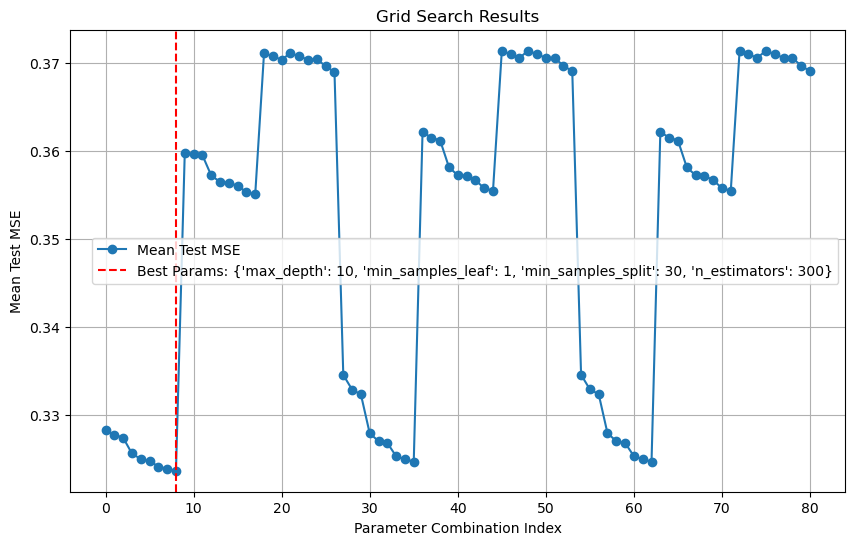

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定義參數網格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [1, 5, 10]
}

# 創建隨機森林回歸器
rf = RandomForestRegressor(random_state=42)

# 網格搜索
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    scoring='neg_mean_squared_error', 
    cv=3, 
    n_jobs=-1, 
    verbose=2
)
grid_search.fit(X_train_scaled, y_train)

# 最佳參數和最佳分數
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

# 使用最佳參數訓練模型
best_rf = grid_search.best_estimator_

# 計算訓練集的評估指標
y_train_pred = best_rf.predict(X_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# 計算測試集的評估指標
y_test_pred = best_rf.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 輸出結果
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAE: {train_mae}")
print(f"Train R²: {train_r2}")

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test R²: {test_r2}")

# 提取結果進行視覺化
results = grid_search.cv_results_
mean_test_scores = -results['mean_test_score']
params = results['params']

# 創建圖示，顯示每個超參數組合的平均測試分數
plt.figure(figsize=(10, 6))
plt.plot(range(len(mean_test_scores)), mean_test_scores, marker='o', label="Mean Test MSE")
plt.axvline(
    x=np.argmin(mean_test_scores), 
    color='red', linestyle='--', label=f"Best Params: {best_params}"
)
plt.xlabel("Parameter Combination Index")
plt.ylabel("Mean Test MSE")
plt.title("Grid Search Results")
plt.legend()
plt.grid()
plt.show()

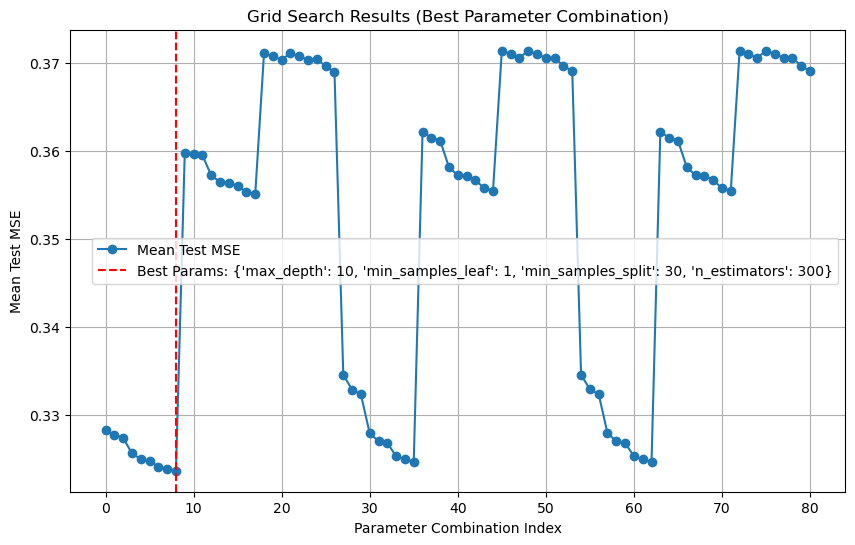

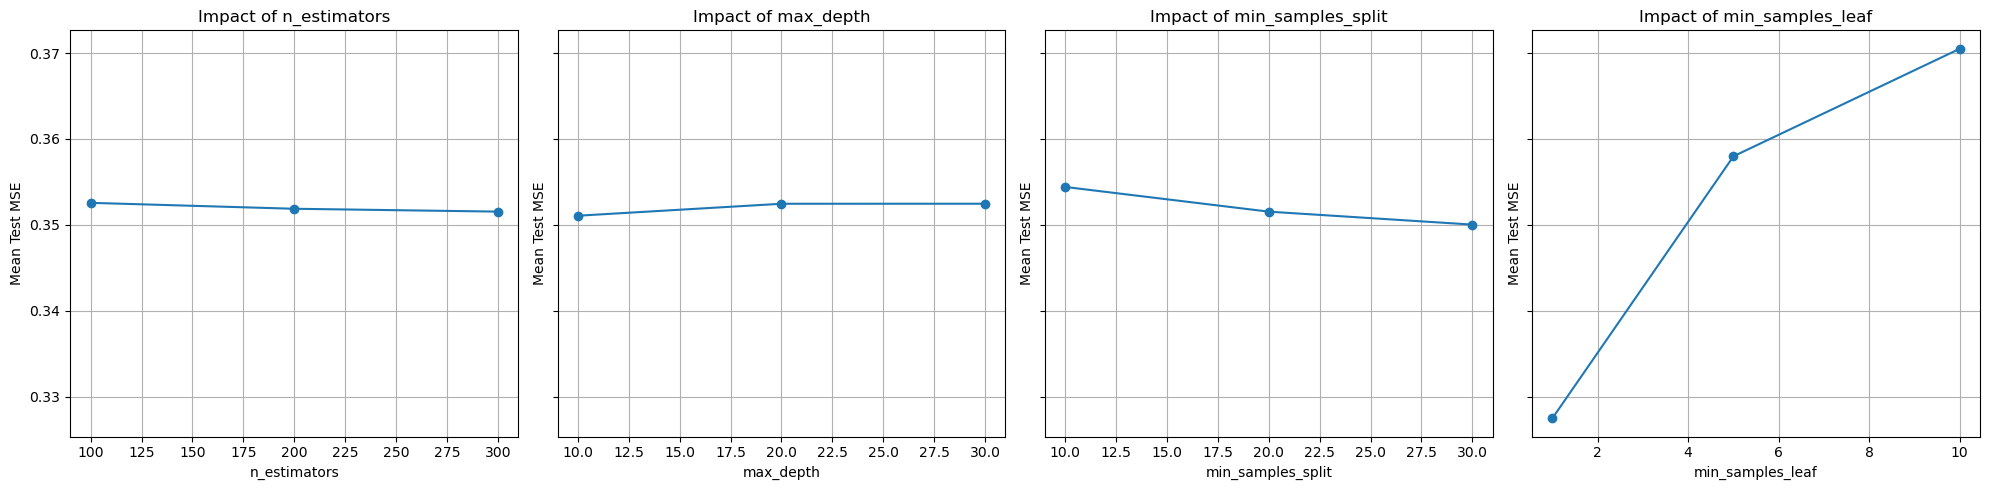

In [92]:
# 提取網格搜索結果
results = pd.DataFrame(grid_search.cv_results_)

# 繪製最佳參數組合的折線圖
plt.figure(figsize=(10, 6))
mean_test_scores = -results['mean_test_score']
plt.plot(range(len(mean_test_scores)), mean_test_scores, marker='o', label="Mean Test MSE")
plt.axvline(
    x=np.argmin(mean_test_scores), 
    color='red', linestyle='--', label=f"Best Params: {best_params}"
)
plt.xlabel("Parameter Combination Index")
plt.ylabel("Mean Test MSE")
plt.title("Grid Search Results (Best Parameter Combination)")
plt.legend()
plt.grid()
plt.show()

# 創建多子圖，分析各參數的影響
param_names = list(param_grid.keys())  # 獲取參數名稱
n_params = len(param_names)  # 總參數數量

fig, axes = plt.subplots(1, n_params, figsize=(5 * n_params, 5), sharey=True)

for i, param in enumerate(param_names):
    # 參數名稱在 GridSearchCV 的結果中以 "param_" 為前綴
    param_column = f"param_{param}"
    if param_column in results.columns:
        param_values = results[param_column]  # 該參數的所有取值
        mean_test_scores = -results['mean_test_score']  # 取負值以還原 MSE
        df = pd.DataFrame({param: param_values, 'mean_test_score': mean_test_scores})

        # 計算每個參數值的平均測試分數
        grouped = df.groupby(param)['mean_test_score'].mean().reset_index()
        axes[i].plot(grouped[param], grouped['mean_test_score'], marker='o')
        axes[i].set_xlabel(param)
        axes[i].set_ylabel("Mean Test MSE")
        axes[i].set_title(f"Impact of {param}")
        axes[i].grid()

plt.tight_layout()
plt.show()

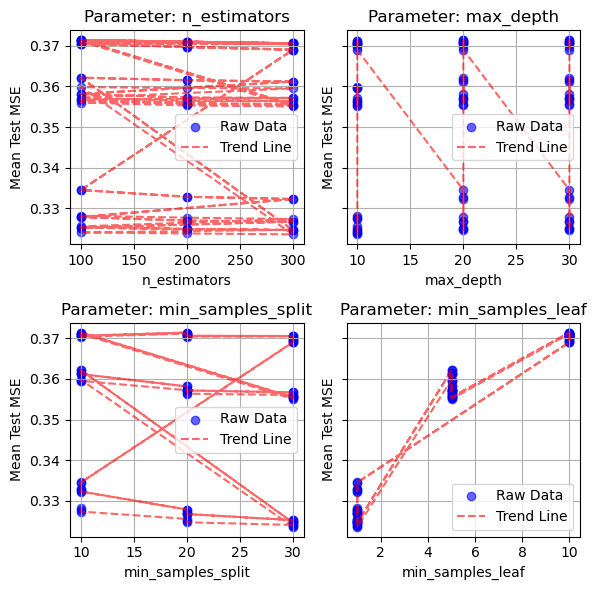

In [102]:
import matplotlib.pyplot as plt
import pandas as pd

# 提取 GridSearchCV 的結果
results = pd.DataFrame(grid_search.cv_results_)

# 參數名稱（從 param_grid 提取）
param_names = list(param_grid.keys())

# 繪製分子圖
n_params = len(param_names)  # 參數數量
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharey=True)  # 2*2 的輸出格式

# 遍歷參數並繪圖
axes = axes.ravel()  # 將 2D 的 axes 陣列展平，方便索引
for i, param in enumerate(param_names):
    # 確認結果 DataFrame 中參數名稱的格式
    param_column = f"param_{param}"
    if param_column in results.columns:
        # 提取當前參數的值及測試分數
        param_values = results[param_column]
        mean_test_scores = -results["mean_test_score"]  # MSE 取負值還原

        # 每個參數值對應的所有結果（無分組）
        axes[i].scatter(param_values, mean_test_scores, alpha=0.6, label="Raw Data", color="blue")
        axes[i].plot(param_values, mean_test_scores, alpha=0.6, linestyle="--", color="red", label="Trend Line")
        
        # 添加圖標與標題
        axes[i].set_title(f"Parameter: {param}", fontsize=12)
        axes[i].set_xlabel(param, fontsize=10)
        axes[i].set_ylabel("Mean Test MSE", fontsize=10)
        axes[i].grid()
        axes[i].legend()

# 移除多餘的子圖（如果參數少於 4 個）
if len(param_names) < len(axes):
    for j in range(len(param_names), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [61]:
# 生成新的特徵名稱列表
feature_names = X_train.columns.tolist()
print("Updated Feature Names:", feature_names)

Updated Feature Names: ['mon', 'day', 'product_encoded', 'client_encoded', 'raw_material_encoded', 'product_raw_material_interaction_encoded', 'product_client_interaction_encoded', 'product_mon', 'product_day']


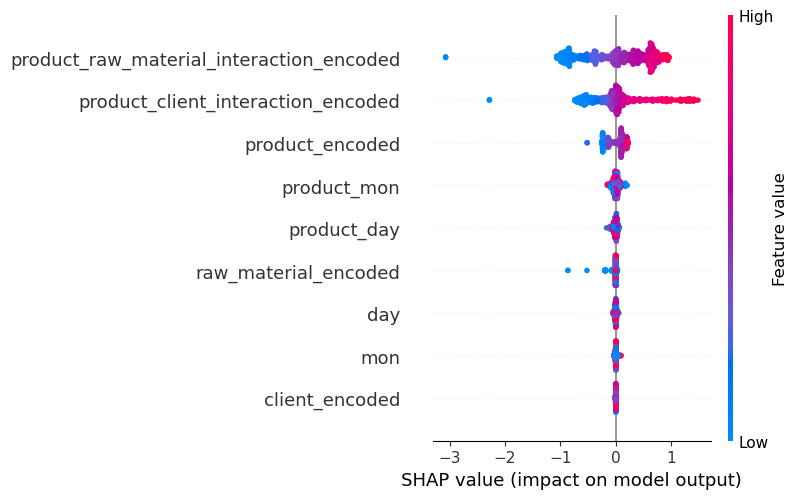

In [62]:
# 標準化之前保存完整的列名
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 確保 SHAP 使用正確的特徵名稱
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)

                                    Feature  Importance
5  product_raw_material_interaction_encoded    0.440165
6        product_client_interaction_encoded    0.351488
2                           product_encoded    0.146820
8                               product_day    0.018525
7                               product_mon    0.017909
4                      raw_material_encoded    0.014832
1                                       day    0.005801
0                                       mon    0.003094
3                            client_encoded    0.001366


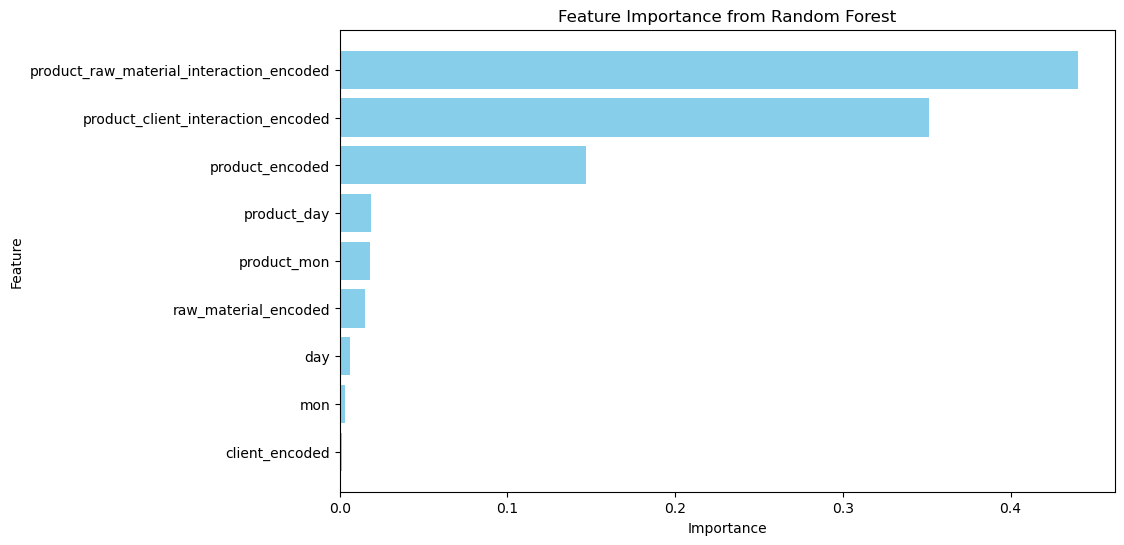

In [74]:
import pandas as pd

# 獲取隨機森林的特徵重要性
feature_importances = best_rf.feature_importances_

# 將特徵重要性轉為 DataFrame 並排序
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# 顯示特徵重要性
print(importance_df)

# 繪製條形圖
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()  # 反轉 y 軸，重要特徵排在頂部
plt.show()

In [78]:
import pandas as pd

# 將 SHAP 值轉為 DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

# 計算每個特徵的 SHAP 統計指標
shap_stats = pd.DataFrame({
    "Feature": shap_df.columns,
    "Mean SHAP Value": shap_df.mean().values,
    "Max SHAP Value": shap_df.max().values,
    "Min SHAP Value": shap_df.min().values
}).sort_values(by="Mean SHAP Value", ascending=False)

# 顯示結果
print(shap_stats)

                                    Feature  Mean SHAP Value  Max SHAP Value  \
6        product_client_interaction_encoded         1.140662        1.176783   
5  product_raw_material_interaction_encoded         0.713395        0.731805   
2                           product_encoded         0.210228        0.210336   
3                            client_encoded         0.001214        0.001286   
0                                       mon        -0.001192       -0.000088   
4                      raw_material_encoded        -0.007910       -0.007750   
7                               product_mon        -0.044374       -0.044161   
1                                       day        -0.059224       -0.030867   
8                               product_day        -0.331484       -0.331282   

   Min SHAP Value  
6        1.138842  
5        0.712338  
2        0.209459  
3        0.000936  
0       -0.005304  
4       -0.007961  
7       -0.045492  
1       -0.060170  
8       -0.334026  

Cross-Validation Results:
Mean CV MSE: 0.31927199109854054 ± 0.014423067838355235
Mean CV RMSE: 0.5649011438408953 ± 0.012597173722259526
Mean CV MAE: 0.4477837640172318 ± 0.01126379702101357


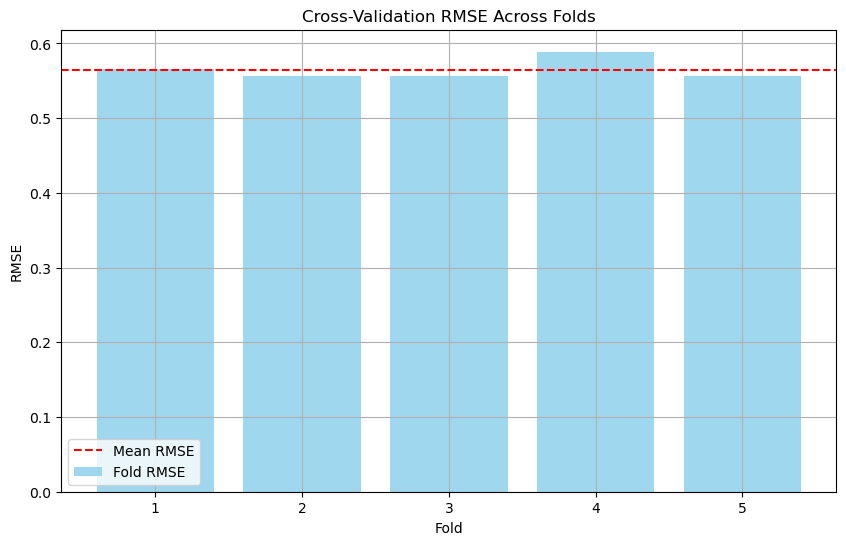

In [130]:
from sklearn.model_selection import cross_val_score

# 使用最佳模型進行交叉驗證
cv_scores = cross_val_score(
    best_rf, 
    X_train_scaled, 
    y_train, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_jobs=-1
)

# 轉換為正值並計算平均與標準差
cv_mse_scores = -cv_scores
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = cross_val_score(
    best_rf, 
    X_train_scaled, 
    y_train, 
    scoring='neg_mean_absolute_error', 
    cv=5, 
    n_jobs=-1
)
cv_mae_scores = -cv_mae_scores

# 輸出交叉驗證結果
print("Cross-Validation Results:")
print(f"Mean CV MSE: {np.mean(cv_mse_scores)} ± {np.std(cv_mse_scores)}")
print(f"Mean CV RMSE: {np.mean(cv_rmse_scores)} ± {np.std(cv_rmse_scores)}")
print(f"Mean CV MAE: {np.mean(cv_mae_scores)} ± {np.std(cv_mae_scores)}")

# 視覺化交叉驗證結果
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), cv_rmse_scores, color='skyblue', alpha=0.8, label='Fold RMSE')
plt.axhline(np.mean(cv_rmse_scores), color='red', linestyle='--', label='Mean RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Across Folds')
plt.legend()
plt.grid()
plt.show()